3.141592653589793


<IPython.core.display.Javascript object>


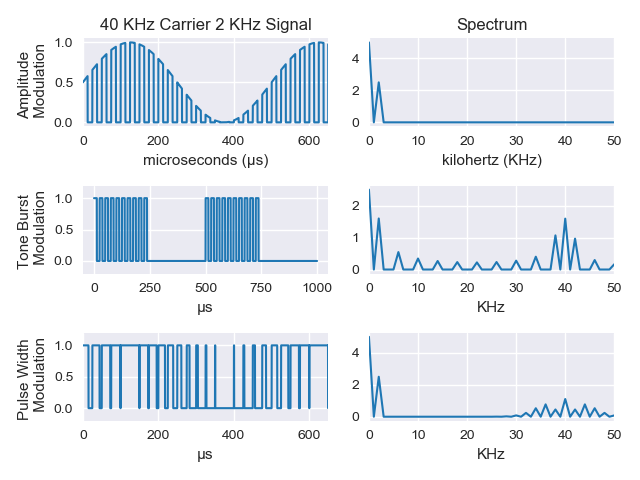

In [23]:
#prerequisites
%matplotlib notebook
import matplotlib as mpl
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import signal
from __future__ import print_function
from math import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
#seaborn
sns.set_context("notebook", rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid")
#variables
s = pl.arange(0, 1000, 0.001)
hirez = pl.arange(0, 1000000, 1)
khz = 2*np.pi/1000
width = 2
height = 3
print(np.pi)
##button = widgets.Button(description="render")
#interact(g, w = widgets.IntSlider(min = 1, max = 6, value = 2), h = widgets.IntSlider(min = 1, max = 6, value = 4))
#def g(w, h):
#    print(w, h)
#    #display(button)
#    #button.on_click(render(w, h))
#    render(w, h)
def squarewave(f, duty = 0.5):
    tallwave = signal.square(s*f, duty)+1
    wave = tallwave/2
    return wave
def pwm(f):
    sig = np.sin(f*s)
    wave = squarewave(40*khz, (sig + 1)/2)
    return wave
#plotting
def render(width, height):
    pl.clf()
        #amplitude modulation
    pl.subplot(height, width, 0%(width*height)+1)
    pl.title("40 KHz Carrier 2 KHz Signal")
    pl.ylabel("Amplitude \n Modulation")
    pl.plot(s, (np.sin(2*khz*s)+1)/2*squarewave(40*khz))
    pl.xlim([0, 650])
    pl.xlabel("microseconds (µs)")
        #amplitude modulation spectrum
    pl.subplot(height, width, 1%(width*height)+1)
    pl.title("Spectrum")
    pl.plot(hirez, abs(pl.fft(np.sin(2*khz*s)+1)/2*squarewave(40*khz))/100000)
    pl.xlim([0, 50])
    pl.xlabel("kilohertz (KHz)")
        #tone burst modulation
    pl.subplot(height, width, 2%(width*height)+1)
    pl.ylabel("Tone Burst \n Modulation")
    #pl.title("40KHz * 2KHz")
    pl.plot(s, squarewave(2*khz)*squarewave(40*khz))
    pl.ylim([-0.2, 1.2])
    pl.xlabel("µs")
        #tone burst spectrum
    pl.subplot(height, width, 3%(width*height)+1)
    #pl.title("Spectrum")
    pl.plot(hirez, abs(pl.fft(squarewave(2*khz)*squarewave(40*khz)))/100000)
    pl.xlim([0, 50])
    pl.xlabel("KHz")
        #pulse width modulation
    pl.subplot(height, width, 4%(width*height)+1)
    pl.ylabel("Pulse Width \n Modulation")
    #pl.title("40KHz Carrier, 2KHz DCM")
    pl.plot(s, pwm(2*khz))
    pl.xlim([0, 650])
    pl.ylim([-0.2, 1.2])
    pl.xlabel("µs")
        #pulse width modulation spectrum
    pl.subplot(height, width, 5%(width*height)+1)
    #pl.title("Spectrum")
    pl.plot(hirez, abs(pl.fft(pwm(2*khz)))/100000)
    pl.xlim([0, 50])
    pl.xlabel("KHz")
    #formatting
    pl.tight_layout()
render(width, height)